In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

In [48]:
train = pd.read_csv("train.csv", sep = ';', index_col=False)

## EDA

In [44]:
train.head()

,Id,Campagne,Region,Site,Famille,Variete,Num Parcelle,CodeTracabilite,Date,Tonnage
0,1,20/21,GHARB,Chorf Laghouazi,CLA,CLA1,13030,TR11130,01/10/2020,"269,855"
1,2,20/21,GHARB,Chorf Laghouazi,CLA,CLA6,18030,TR11140,01/10/2020,"101605,9951"
2,3,20/21,GHARB,Chorf Laghouazi,CLA,CLA12,13010,TR11120,01/10/2020,"170,354"
3,4,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,12010,TR11090,01/10/2020,"37891,08567"
4,5,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,12020,TR11100,01/10/2020,"45197,56034"


In [20]:
train.shape

(3119, 10)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Campagne         3119 non-null   object        
 1   Region           3119 non-null   object        
 2   Site             3119 non-null   object        
 3   Famille          3119 non-null   object        
 4   Variete          3119 non-null   object        
 5   CodeTracabilite  3119 non-null   object        
 6   Date             3119 non-null   datetime64[ns]
 7   Tonnage          3119 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 195.1+ KB


In [49]:
train = train.drop(columns=['Id', 'Num Parcelle'])
train["Date"] = pd.to_datetime(train["Date"])
train['Tonnage'] = train['Tonnage'].str.replace(',', '.').astype(float)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Campagne         3119 non-null   object        
 1   Region           3119 non-null   object        
 2   Site             3119 non-null   object        
 3   Famille          3119 non-null   object        
 4   Variete          3119 non-null   object        
 5   CodeTracabilite  3119 non-null   object        
 6   Date             3119 non-null   datetime64[ns]
 7   Tonnage          3119 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 195.1+ KB


### Spot anomalies

In [51]:
# Detecting duplicates
duplicates = train[train.duplicated()]
duplicates

,Campagne,Region,Site,Famille,Variete,CodeTracabilite,Date,Tonnage
210,20/21,ORIENTAL,Cherraa,CLA,CLA5,TR11200,2020-01-11,227.300
1574,21/22,ORIENTAL,Cherraa,CLA,CLA5,TR11500,2021-01-11,85.592
1577,21/22,ORIENTAL,Cherraa,CLA,CLA5,TR11500,2021-01-11,85.592
1609,21/22,SOUSS,Taroudant,CLA,CLA15,TR23000,2021-01-11,797.000


In [87]:
cleaned_train = train.drop_duplicates()

In [88]:
cleaned_train = cleaned_train.reset_index(drop=True)

In [70]:
cleaned_train.head()

,Campagne,Region,Site,Famille,Variete,CodeTracabilite,Date,Tonnage
0,20/21,GHARB,Chorf Laghouazi,CLA,CLA1,TR11130,2020-01-10,269.85500
1,20/21,GHARB,Chorf Laghouazi,CLA,CLA6,TR11140,2020-01-10,101605.99510
2,20/21,GHARB,Chorf Laghouazi,CLA,CLA12,TR11120,2020-01-10,170.35400
3,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,TR11090,2020-01-10,37891.08567
4,20/21,GHARB,Chorf Laghouazi,CLA,CLA14,TR11100,2020-01-10,45197.56034


In [71]:
cleaned_train.isnull().sum()  ##none null value

Campagne           0
Region             0
Site               0
Famille            0
Variete            0
CodeTracabilite    0
Date               0
Tonnage            0
dtype: int64

<Axes: ylabel='Tonnage'>

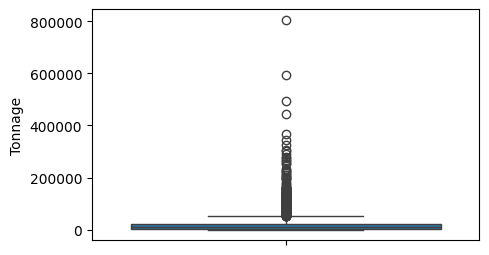

In [72]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=cleaned_train['Tonnage'])

In [82]:
# Set 'Date' as the index of the DataFrame for plotting
cleaned_train.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date) if it's not already sorted
cleaned_train.sort_index(inplace=True)

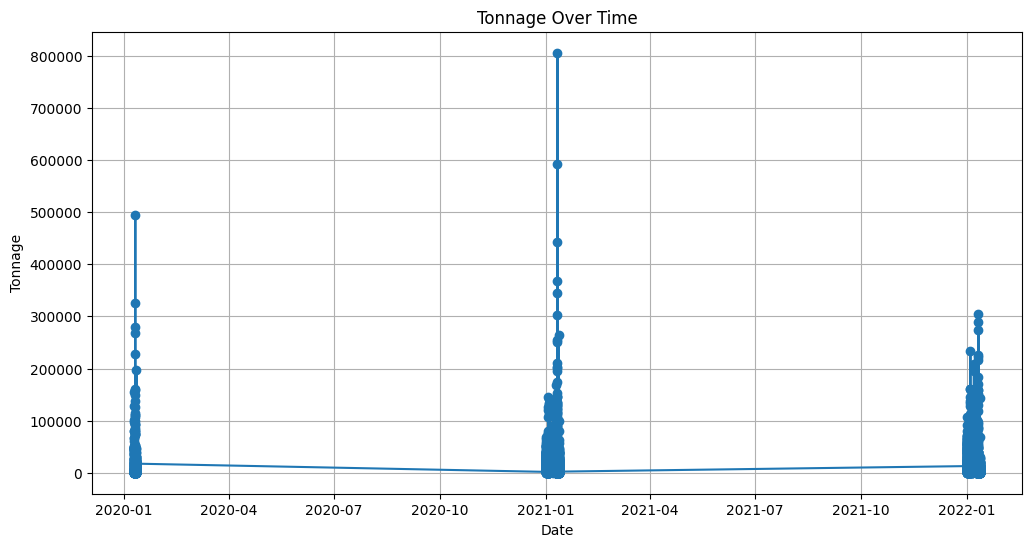

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_train['Tonnage'], marker='o', linestyle='-')
plt.title('Tonnage Over Time')
plt.xlabel('Date')
plt.ylabel('Tonnage')
plt.grid(True)
plt.show()
# i need to see tonnage dyal each place!!

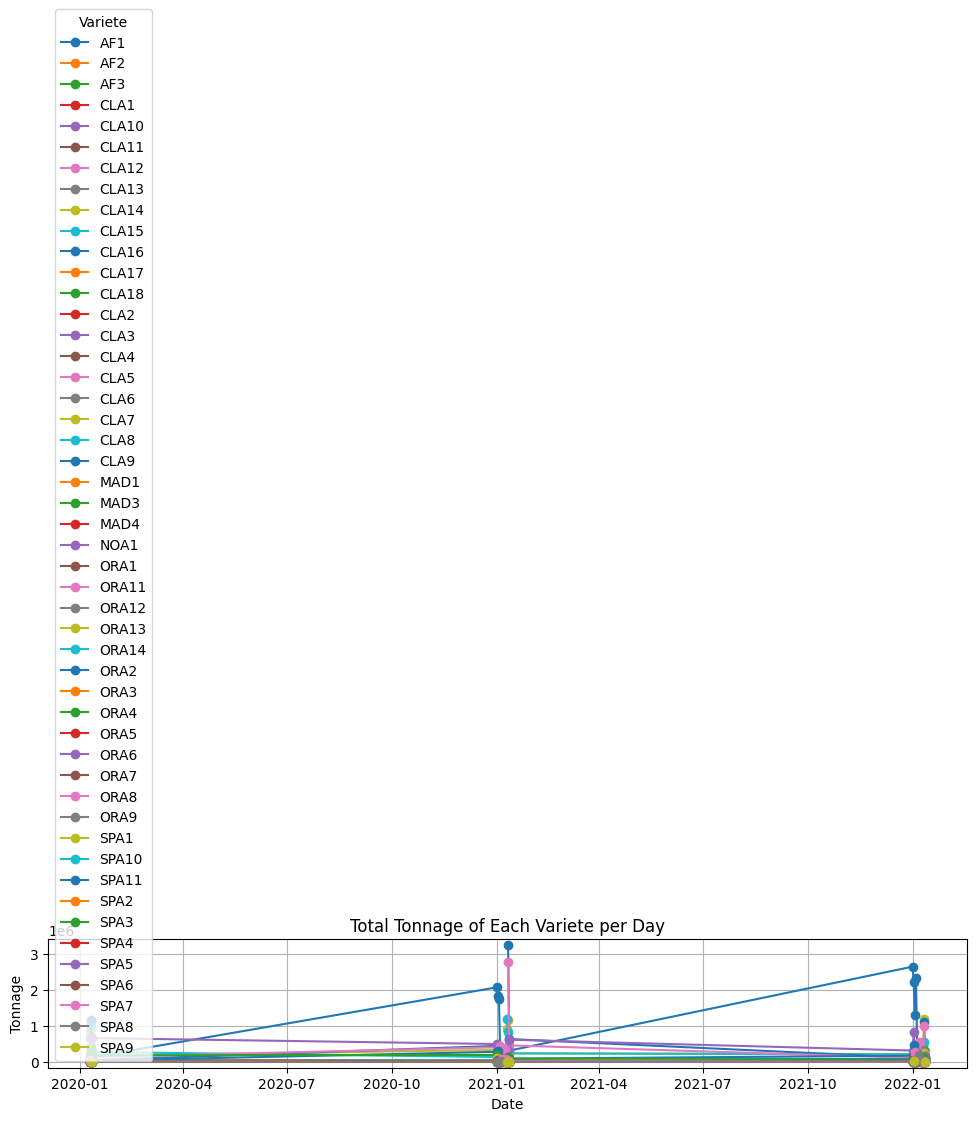

In [90]:
# Group by 'Date' and 'Variete', then sum the 'Tonnage'
grouped = cleaned_train.groupby(['Date', 'Famille']).agg({'Tonnage': 'sum'}).reset_index()

# Pivot the data for plotting
pivot_df = grouped.pivot(index='Date', columns='Famille', values='Tonnage')

# Plotting
plt.figure(figsize=(10, 7))

for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

plt.title('Total Tonnage of Each Variete per Day')
plt.xlabel('Date')
plt.ylabel('Tonnage')
plt.legend(title='Variete')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned dataframe to a new file
# df.to_csv('cleaned_data.csv', index=False)

### Others

In [ ]:
train_trans = train.set_index(['Campagne', 'Region', 'Site', 'Famille', 'Variete', 'Num Parcelle', 'CodeTracabilite', 'Date']).sort_index()

In [ ]:
train_trans.head()

Tonnage
Campagne Region Site        Famille Variete Num Parcelle CodeTracabilite Date                   
20/21    GHARB  Ben Mansour AF      AF1     11240        TR11240         2020-01-12          161
                                                                         2021-01-02   22747,5905
                            CLA     CLA13   11130        TR11130         2020-01-10  36082,22357
                                            11212        TR11212         2020-01-10  48051,99275
                                    CLA14   11211        TR11211         2020-01-10  24892,98368

▶️311


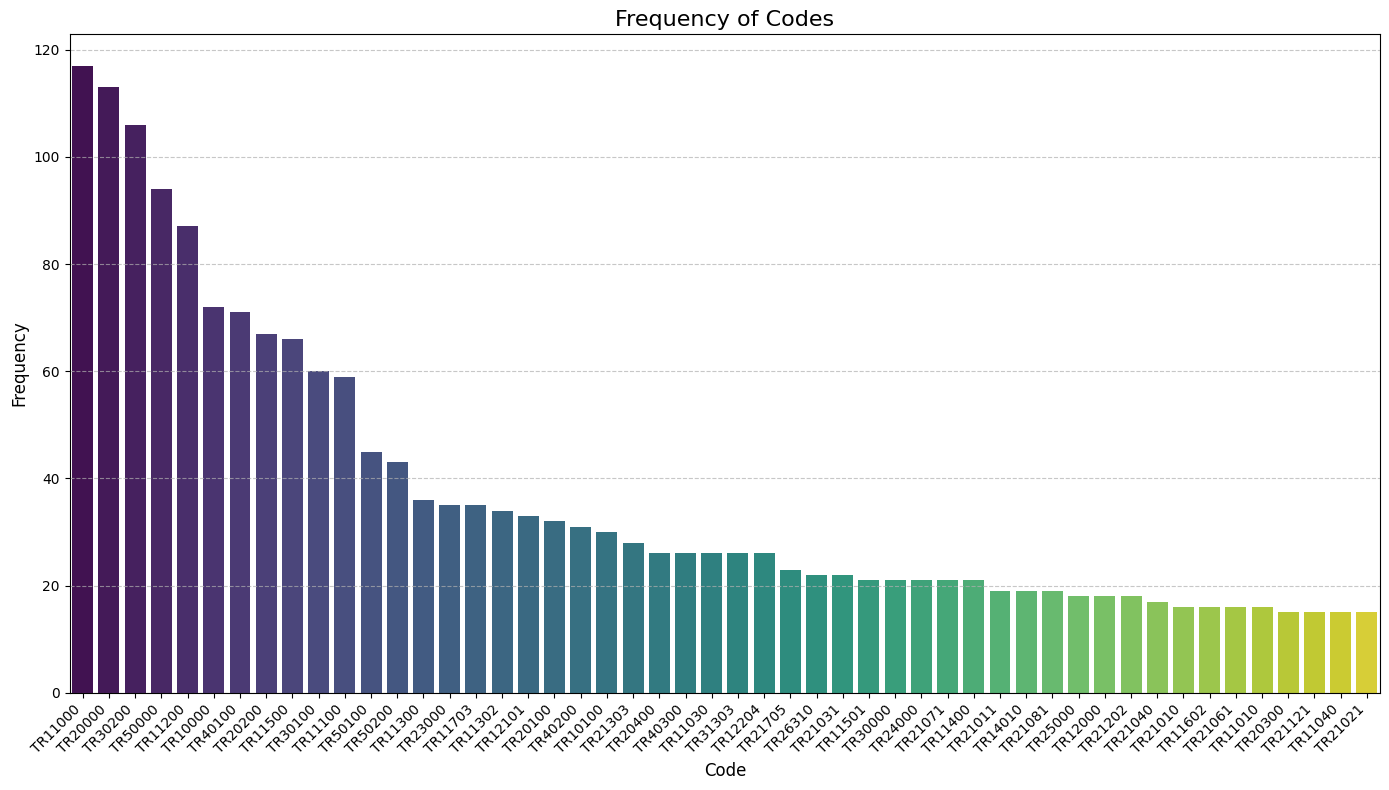

In [ ]:
## Observations non uniformes!

CodeTracabilite = len(train["CodeTracabilite"].value_counts().index)

print(f'▶️{CodeTracabilite}')
top_n = 50  # Number of top codes to display
top_codes = train['CodeTracabilite'].value_counts().head(top_n)

plt.figure(figsize=(14, 8))  # Adjust the size as needed
sns.barplot(x=top_codes.index, y=top_codes.values, palette='viridis')
plt.xlabel('Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and alignment
plt.yticks(fontsize=10)
plt.title('Frequency of Codes', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()